In [2]:
library("dplyr")
library("tidyr")
library("ggplot2")
library("reshape2")
library("psych")

#Working directory
setwd(dirname(file.choose("/Users/baileygodolphin/Desktop/MSc/htru2/HTRU_2.csv")))
getwd()

[1] "/Users/baileygodolphin"

In [3]:
#1.Load data
pulsar_data <- read.csv("/Users/baileygodolphin/Desktop/MSc/htru2/HTRU_2.csv")

#2.Clean data
head(pulsar_data)
str(pulsar_data)

pulsar_data %>%
  group_by_all() %>%
  filter(n()>1) %>%
  ungroup()

sum(is.na(pulsar_data))

,ip_mean,ip_sd,ip_xsk,ip_skew,dmsnr_mean,dmsnr_sd,dmsnr_xsk,dmsnr_skew,pulsar_instance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,140.56250,55.68378,-0.23457141,-0.6996484,3.199833,19.11043,7.975532,74.24222,0
2,102.50781,58.88243,0.46531815,-0.5150879,1.677258,14.86015,10.576487,127.39358,0
3,103.01562,39.34165,0.32332837,1.0511644,3.121237,21.74467,7.735822,63.17191,0
4,136.75000,57.17845,-0.06841464,-0.6362384,3.642977,20.95928,6.896499,53.59366,0
5,88.72656,40.67223,0.60086608,1.1234917,1.178930,11.46872,14.269573,252.56731,0
6,93.57031,46.69811,0.53190485,0.4167211,1.636288,14.54507,10.621748,131.39400,0


'data.frame':	17898 obs. of  9 variables:
 $ ip_mean        : num  140.6 102.5 103 136.8 88.7 ...
 $ ip_sd          : num  55.7 58.9 39.3 57.2 40.7 ...
 $ ip_xsk         : num  -0.2346 0.4653 0.3233 -0.0684 0.6009 ...
 $ ip_skew        : num  -0.7 -0.515 1.051 -0.636 1.123 ...
 $ dmsnr_mean     : num  3.2 1.68 3.12 3.64 1.18 ...
 $ dmsnr_sd       : num  19.1 14.9 21.7 21 11.5 ...
 $ dmsnr_xsk      : num  7.98 10.58 7.74 6.9 14.27 ...
 $ dmsnr_skew     : num  74.2 127.4 63.2 53.6 252.6 ...
 $ pulsar_instance: int  0 0 0 0 0 0 0 0 0 0 ...


ip_mean,ip_sd,ip_xsk,ip_skew,dmsnr_mean,dmsnr_sd,dmsnr_xsk,dmsnr_skew,pulsar_instance
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>


[1] 0

**After discovering the data has no missing values or duplicates, exploratory data analysis can begin. For preference and ease, the target class variable for pulsar_instance had its data type changed from integer to logical.**

In [4]:
#Changing pulsar_instance variable data type
pulsar_data$pulsar_instance <- as.logical(pulsar_data$pulsar_instance)

    ip_mean            ip_sd           ip_xsk           ip_skew       
 Min.   :  5.812   Min.   :24.77   Min.   :-1.8760   Min.   :-1.7919  
 1st Qu.:100.930   1st Qu.:42.38   1st Qu.: 0.0271   1st Qu.:-0.1886  
 Median :115.078   Median :46.95   Median : 0.2232   Median : 0.1987  
 Mean   :111.080   Mean   :46.55   Mean   : 0.4779   Mean   : 1.7703  
 3rd Qu.:127.086   3rd Qu.:51.02   3rd Qu.: 0.4733   3rd Qu.: 0.9278  
 Max.   :192.617   Max.   :98.78   Max.   : 8.0695   Max.   :68.1016  
   dmsnr_mean          dmsnr_sd        dmsnr_xsk        dmsnr_skew      
 Min.   :  0.2132   Min.   :  7.37   Min.   :-3.139   Min.   :  -1.977  
 1st Qu.:  1.9231   1st Qu.: 14.44   1st Qu.: 5.782   1st Qu.:  34.961  
 Median :  2.8018   Median : 18.46   Median : 8.434   Median :  83.065  
 Mean   : 12.6144   Mean   : 26.33   Mean   : 8.304   Mean   : 104.858  
 3rd Qu.:  5.4643   3rd Qu.: 28.43   3rd Qu.:10.703   3rd Qu.: 139.309  
 Max.   :223.3921   Max.   :110.64   Max.   :34.540   Max.   :119

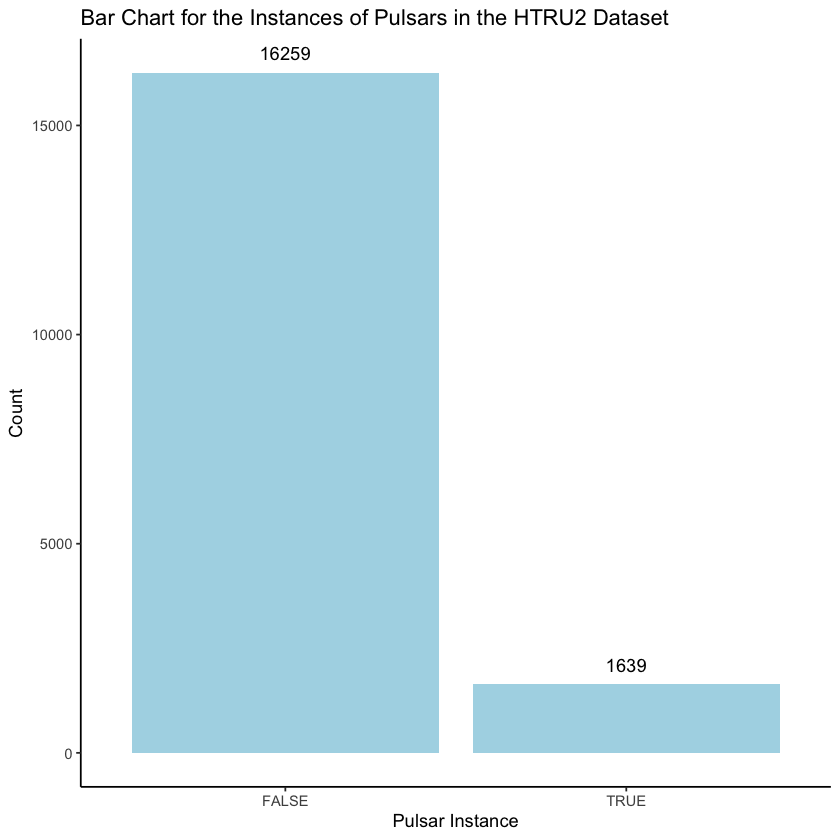

In [6]:
#3. EDA
summary(pulsar_data)

# Class imbalance bar chart
ggplot(pulsar_data,aes(pulsar_instance)) +
  geom_bar(fill='lightblue') +
  geom_text(stat='count', aes(label=after_stat(count)), vjust=-1) + 
  labs(title = "Bar Chart for the Instances of Pulsars in the HTRU2 Dataset", x = "Pulsar Instance", y = "Count") +
  theme_classic()

**With 16,259 instances of non-pulsar signals and only 1,639 instances of genuine pulsar signals, the dataset exhibits a substantial imbalance in class representation. 
As a result, these models could struggle to accurately identify and classify rare pulsar instances, leading to insignificant performance metrics and reduced sensitivity to pulsar signals**


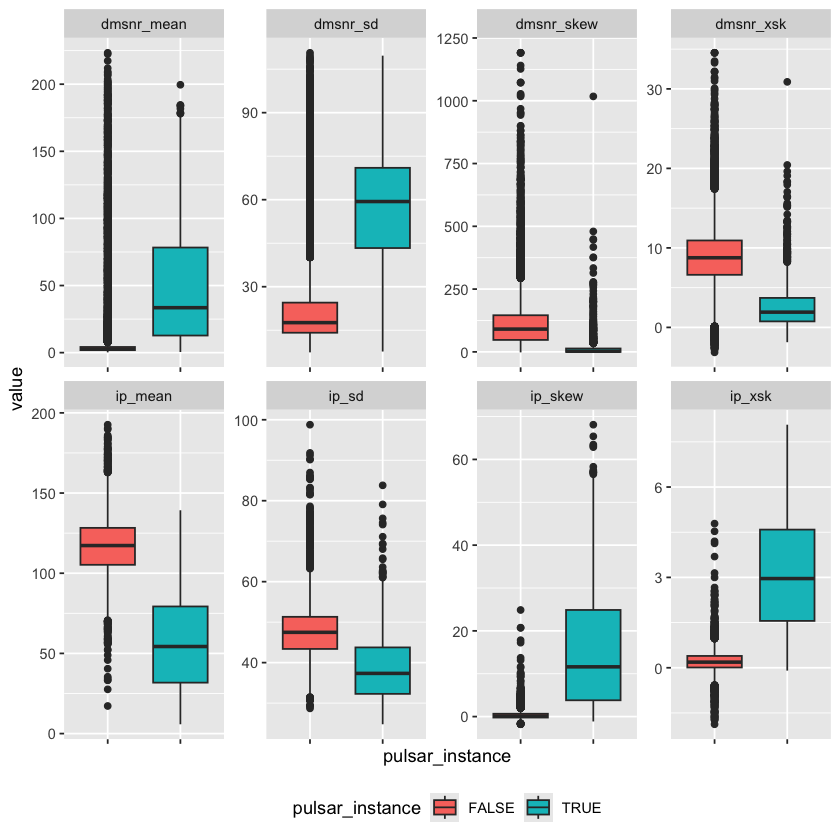

In [7]:
# Variable boxplots
pulsar_data %>% gather(predictors, value, -pulsar_instance) %>%
  ggplot(aes(pulsar_instance, value, fill = pulsar_instance)) +
  geom_boxplot() +
  facet_wrap(~predictors, scales = "free", ncol = 4) +
  theme(axis.text.x = element_blank(), legend.position="bottom")

**The boxplots of the dataset for the independent variables provides insights into how skewed they are, in addition to the large count of outliers. This could introduce potential biases into the model training and predictions, and unknowingly influence the model parameters and their classification robustness.**

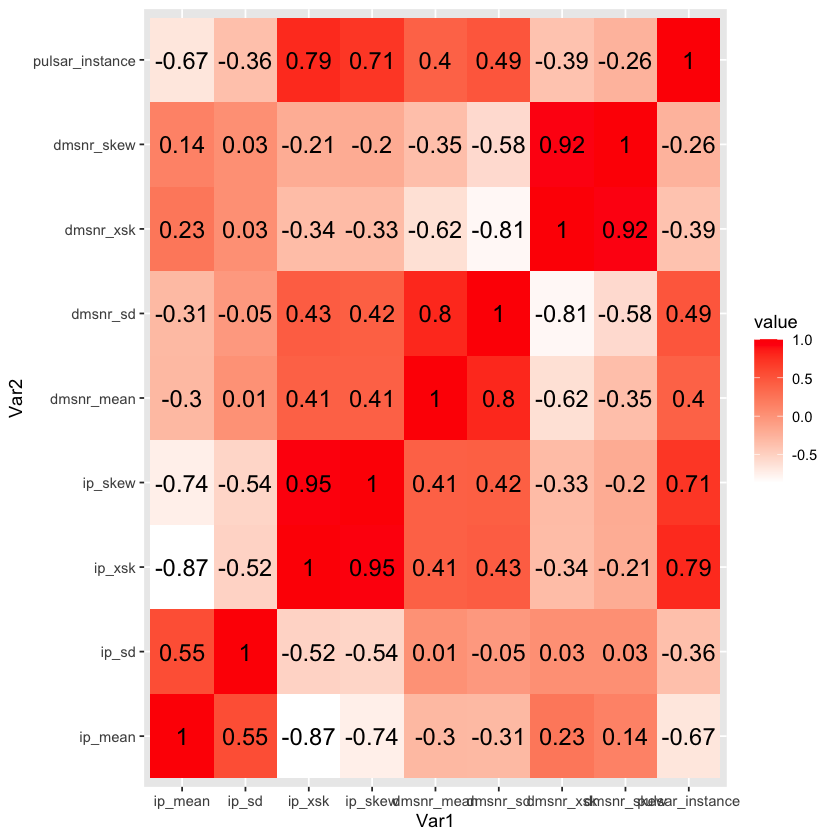

In [8]:
# Correlation heatmap
cor_data <- round(cor(pulsar_data), 2)

melted_cor <- melt(cor_data)

ggplot(data = melted_cor, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile() +
  geom_text(aes(Var2, Var1, label = value), size = 5) + 
  scale_fill_gradient(low="white", high="red")

**The heatmap displays the presence of multicollinearity with many strong positive and negative correlations calculated between the independent variables. This multicollinearity could hinder the interpretability of these classification models by complicating the identification of significant features and their respective contributions in detecting pulsar signals. Also, it could increase the variance of model parameter estimates, resulting in overfitting.**

**The classification models chosen to be tested are logistic regression, Naïve Bayes, K-Nearest Neighbour, decision tree, and random forest. Once trained they will be evaluated based on the chosen performance metrics of accuracy, precision, recall, and F1-score.**

In [23]:
#4. Classification modelling
library("pROC")
library("e1071")
library("caret")
library("matrixStats")
library("caTools")
library("randomForest")
library("naivebayes")

# Normalise and Prepare Data
startype <- as.factor(pulsar_data$pulsar_instance)
pstarpred <- as.matrix(select(pulsar_data, -c(length(pulsar_data))))
x_centered <- sweep(pstarpred, 2, colMeans(pstarpred))
x_scaled <- sweep(x_centered, 2, colSds(pstarpred), FUN = "/")

# Create Test and Train set
set.seed(123, sample.kind = "Rounding")
test_index <- createDataPartition(startype, times = 1, p = 0.8, list = FALSE)
test_x <- x_scaled [test_index,]
test_y <- startype[test_index]
train_x <- x_scaled [-test_index,]
train_y <- startype[-test_index]

tr <- trainControl(method = "repeatedcv", number = 5, repeats = 3)

Warning message in set.seed(123, sample.kind = "Rounding"):
“non-uniform 'Rounding' sampler used”


In [16]:
# Logistic Regression model
set.seed(123, sample.kind = "Rounding")
train_lr <- train(train_x, train_y, method = "glm", tuneLength = 10, trControl = tr)

lr_preds <- predict(train_lr, test_x)
lr_cm <- confusionMatrix(lr_preds, test_y)
lr_cm$overall["Accuracy"]
lr_cm$byClass['Precision']
lr_cm$byClass['Recall']
lr_cm$byClass['F1']

Warning message in set.seed(123, sample.kind = "Rounding"):
“non-uniform 'Rounding' sampler used”


Accuracy 
0.9795391

Precision 
0.9822499

Recall 
0.9954643

F1 
0.988813

In [19]:
# Naive Bayes model
set.seed(123, sample.kind = "Rounding")
train_nb <- train(train_x, train_y, method = "naive_bayes", tuneLength = 10, trControl = tr)

nb_preds <- predict(train_nb, test_x)
nb_cm <- confusionMatrix(nb_preds, test_y)
nb_cm$overall["Accuracy"]
nb_cm$byClass['Precision']
nb_cm$byClass['Recall']
nb_cm$byClass['F1']

Warning message in set.seed(123, sample.kind = "Rounding"):
“non-uniform 'Rounding' sampler used”


Accuracy 
0.9611732

Precision 
0.9861784

Recall 
0.9708641

F1 
0.9784613

In [20]:
#KNN model
set.seed(123, sample.kind = "Rounding")
train_knn <- train(train_x, train_y, method = "knn", tuneLength = 10, trControl = tr)

knn_preds <- predict(train_knn, test_x)
knn_cm <- confusionMatrix(knn_preds, test_y)
knn_cm$overall["Accuracy"]
knn_cm$byClass['Precision']
knn_cm$byClass['Recall']
knn_cm$byClass['F1']

Warning message in set.seed(123, sample.kind = "Rounding"):
“non-uniform 'Rounding' sampler used”


Accuracy 
0.9777235

Precision 
0.9805347

Recall 
0.9952337

F1 
0.9878295

In [21]:
#Decision Tree model
set.seed(123, sample.kind = "Rounding")
train_dt <- train(train_x, train_y, method = "rpart", tuneLength = 10, trControl = tr)

dt_preds <- predict(train_dt, test_x)
dt_cm <- confusionMatrix(dt_preds, test_y)
dt_cm$overall["Accuracy"]
dt_cm$byClass['Precision']
dt_cm$byClass['Recall']
dt_cm$byClass['F1']

Warning message in set.seed(123, sample.kind = "Rounding"):
“non-uniform 'Rounding' sampler used”


Accuracy 
0.974581

Precision 
0.9840735

Recall 
0.9880074

F1 
0.9860365

In [22]:
#Random Forest model
set.seed(123, sample.kind = "Rounding")
train_rf <- train(train_x, train_y, method = "rf", tuneLength = 2, trControl = tr, ntree= 200, importance = TRUE)

rf_preds <- predict(train_rf, test_x)
rf_cm <- confusionMatrix(rf_preds, test_y)
rf_cm$overall["Accuracy"]
rf_cm$byClass['Precision']
rf_cm$byClass['Recall']
rf_cm$byClass['F1']

Warning message in set.seed(123, sample.kind = "Rounding"):
“non-uniform 'Rounding' sampler used”


Accuracy 
0.978352

Precision 
0.9828871

Recall 
0.9934656

F1 
0.988148

**These findings reveal significant performance across all models. Logistic regression exhibited creditable performance, achieving an accuracy of 97.95% and demonstrating robustness with a precision of 98.22% and recall of 99.55%. Naïve Bayes, while slightly lower in accuracy at 96.14%, showcased strong precision of 98.62% and recall of 97.11%. KNN exhibited a strong accuracy of 97.77% and recall of 99.52%, making it a promising candidate for pulsar detection tasks. Decision tree models also performed admirably, with an accuracy of 97.46%, precision of 98.41%, and recall of 98.80%. However, random forest emerged as the top-performing model, achieving a high accuracy (97.84%) and demonstrating remarkable precision (98.29%) and recall (99.35%), thus offering the best effectiveness in distinguishing pulsar signals from noise in the models tested.**